# Vehicle Type Classification with **XGBoost**

## Loading

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Load the dataset
file_path = "/Users/jakob/Library/CloudStorage/OneDrive-student.kit.edu/Studium/02_Master/4. Semester/seminar/RoadTrafficNoise/IDMT-Traffic/datasets/df_main_encoded_only.csv"

# Load the dataset
df_vehicle_classification = pd.read_csv(file_path)

print(df_vehicle_classification.head())

   Unnamed: 0                                               file  \
0          18  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1116695...   
1          19  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1116695...   
2          20  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1137602...   
3          21  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1137602...   
4          24  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1141442...   

   is_background_encoded  date_time_encoded  location_encoded  \
0                      0                  0                 0   
1                      0                  0                 0   
2                      0                  0                 0   
3                      0                  0                 0   
4                      0                  0                 0   

   speed_kmh_encoded  daytime_encoded  weather_encoded  vehicle_encoded  \
0                  0                1                0                1   
1                  0                1             

## Visualisation to find out possible Data Leakage

/var/folders/vh/1t1ywg4n4fq7xwpclrv4jdyc0000gn/T/ipykernel_18375/3624511814.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Vehicle Class', y='# of Files', data=vehicle_class_df, palette="Paired")


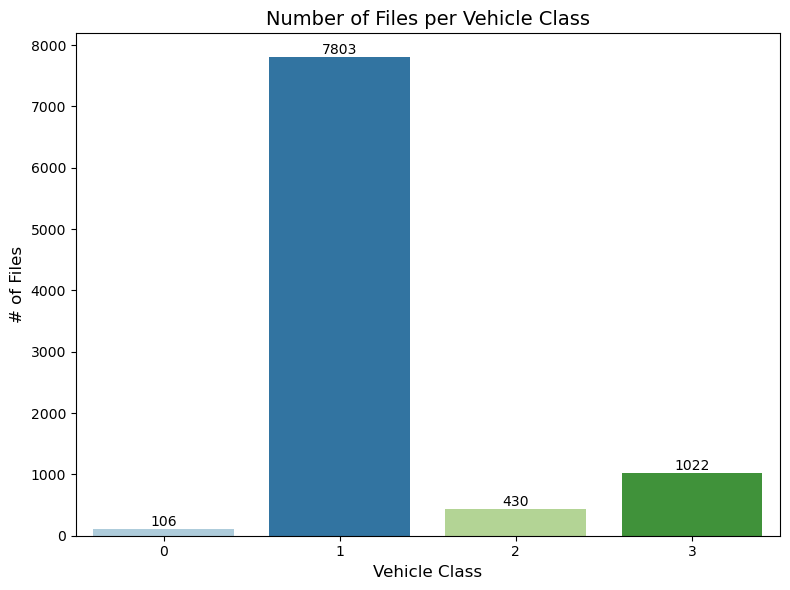

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data already loaded as df_vehicle_classification

# Count the number of files for each vehicle class
vehicle_class_counts = df_vehicle_classification['vehicle_encoded'].value_counts().sort_index()

# Create a DataFrame for the counts (optional, for clarity)
vehicle_class_df = pd.DataFrame({
    'Vehicle Class': vehicle_class_counts.index,
    '# of Files': vehicle_class_counts.values
})
palette=sns.color_palette("deep")
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Vehicle Class', y='# of Files', data=vehicle_class_df, palette="Paired")

# Add numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',  # The number
                (p.get_x() + p.get_width() / 2., height),  # Position at the center of the bar
                ha='center', va='bottom', fontsize=10, color='black')  # Text properties

# Add titles and labels
plt.title('Number of Files per Vehicle Class', fontsize=14)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('# of Files', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

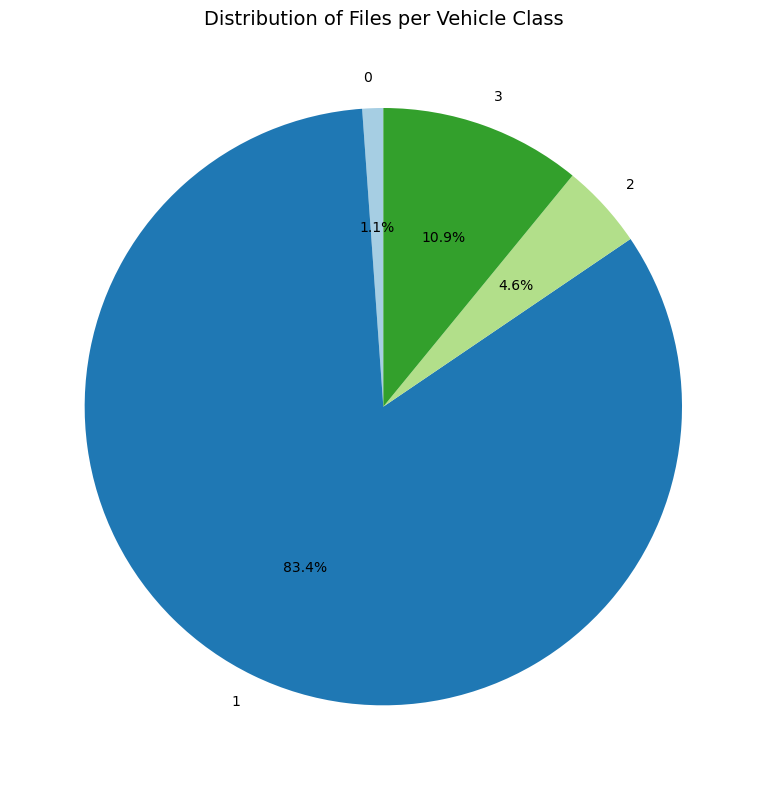

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data already loaded as df_vehicle_classification

# Count the number of files for each vehicle class
vehicle_class_counts = df_vehicle_classification['vehicle_encoded'].value_counts().sort_index()

# Create a DataFrame for the counts (optional, for clarity)
vehicle_class_df = pd.DataFrame({
    'Vehicle Class': vehicle_class_counts.index,
    '# of Files': vehicle_class_counts.values
})

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_class_df['# of Files'], 
        labels=vehicle_class_df['Vehicle Class'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("Paired"))

# Add title
plt.title('Distribution of Files per Vehicle Class', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

All features used

In [12]:
# Extract features and target
# Drop "vehicle_encoded" as it is the target feature. Drop 'file' as it contains all metadata and 'is_background_encoded' as it is unnecessary (always 0)
X = df_vehicle_classification.drop(columns=['file', 'vehicle_encoded', 'is_background_encoded'])
y = df_vehicle_classification['vehicle_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print("Classification Report on test set:")
print(classification_report(y_test, y_pred))

Classification Report on test set:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.92      0.98      0.95      1561
           2       1.00      0.99      0.99        86
           3       0.71      0.36      0.47       205

    accuracy                           0.91      1873
   macro avg       0.86      0.75      0.79      1873
weighted avg       0.90      0.91      0.90      1873



In [13]:
# Extract feature importances from the trained XGBoost model
feature_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Print the sorted feature importances
print(sorted_importances)

date_time_encoded           0.346342
microphone_encoded          0.101849
location_encoded            0.053933
channel_encoded             0.037486
band_18_dB                  0.030475
band_19_dB                  0.027688
weather_encoded             0.015317
daytime_encoded             0.015200
speed_kmh_encoded           0.015175
mfcc_3                      0.014565
band_4_dB                   0.014536
band_3_dB                   0.013296
peak_freq_1                 0.012684
band_1_dB                   0.010888
source_direction_encoded    0.010257
mfcc_5                      0.010189
mfcc_9                      0.009954
band_17_dB                  0.009464
band_20_dB                  0.009459
band_25_dB                  0.009026
Unnamed: 0                  0.008626
octband_dB_mean             0.008384
band_2_dB                   0.008218
band_12_dB                  0.007728
band_27_dB                  0.007589
band_13_dB                  0.007556
peak_dB_2                   0.007320
b

We seems as if the feature date_time has a big influence on the classification. Maybe there is some data leakage. Let's do a plot to show the occurences of vehicle types at the 22 date_time entries:

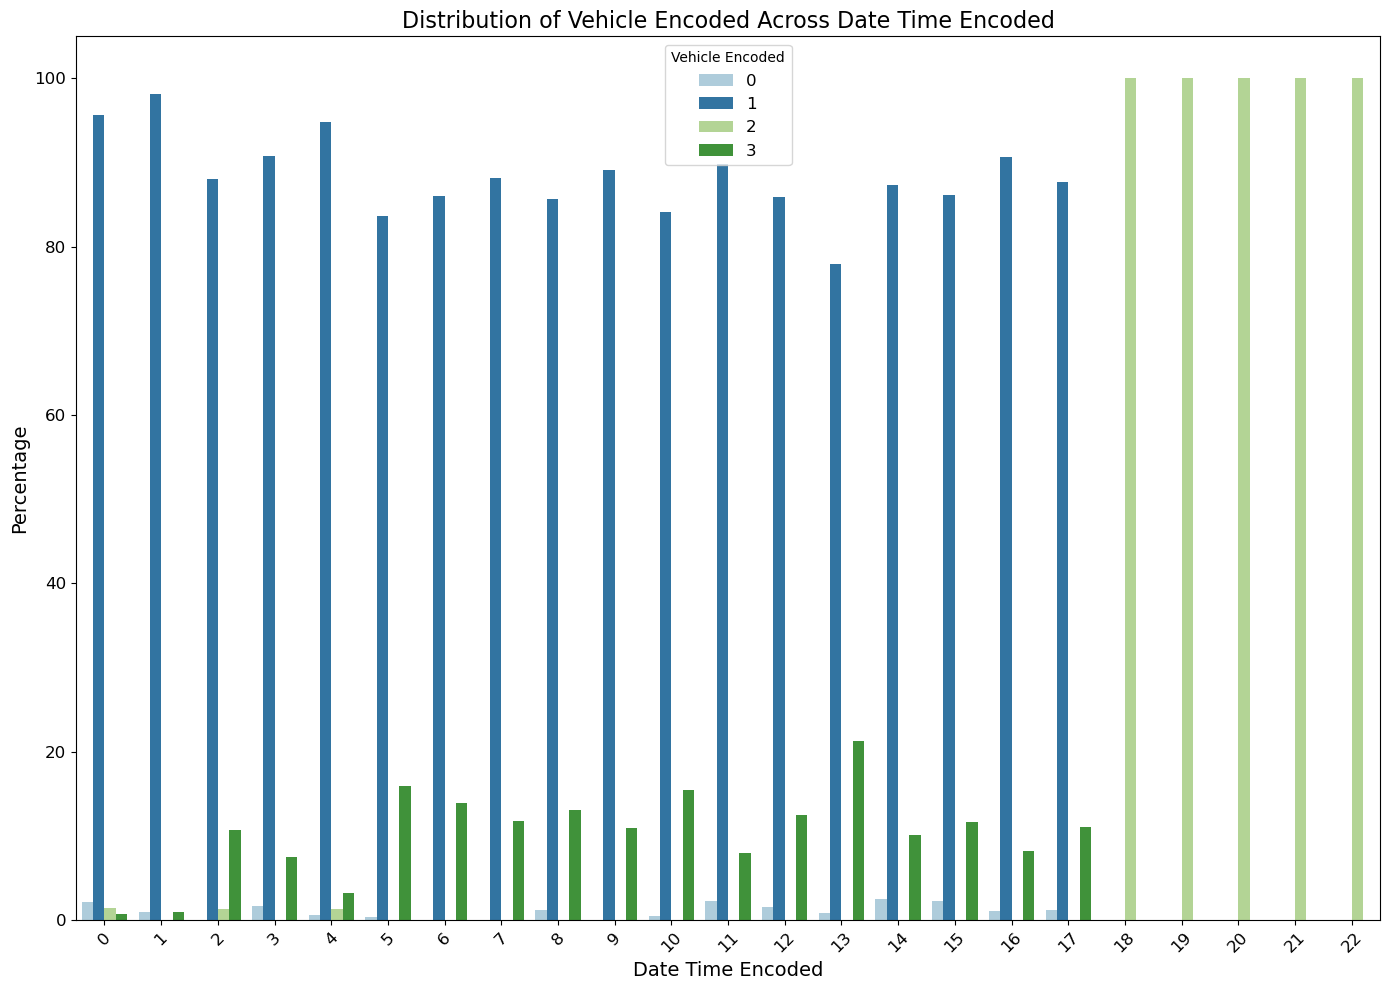

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by `date_time_encoded` and `vehicle_encoded` to count occurrences
grouped_data = df_vehicle_classification.groupby(['date_time_encoded', 'vehicle_encoded']).size().reset_index(name='count')

# Normalize the counts within each `date_time_encoded` to calculate percentages
grouped_data['percentage'] = grouped_data.groupby('date_time_encoded')['count'].transform(lambda x: x / x.sum() * 100)

# Plot the data
plt.figure(figsize=(14, 10))
sns.barplot(data=grouped_data, x='date_time_encoded', y='percentage', hue='vehicle_encoded', palette='Paired')

# Customize the plot
plt.title('Distribution of Vehicle Encoded Across Date Time Encoded', fontsize=16)
plt.xlabel('Date Time Encoded', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Vehicle Encoded', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotate for readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [15]:
# Pivot table
# Group by `date_time_encoded` and `vehicle_encoded` to count occurrences
grouped_data = df_vehicle_classification.groupby(['date_time_encoded', 'vehicle_encoded']).size().reset_index(name='count')

# Normalize the counts within each `date_time_encoded` to calculate percentages
grouped_data['percentage'] = grouped_data.groupby('date_time_encoded')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot table to present numerical relationships
pivot_table = grouped_data.pivot(index='date_time_encoded', columns='vehicle_encoded', values='percentage').fillna(0)

# Print the pivot table
print(pivot_table)

vehicle_encoded           0          1           2          3
date_time_encoded                                            
0                  2.189781  95.620438    1.459854   0.729927
1                  0.938967  98.122066    0.000000   0.938967
2                  0.000000  88.000000    1.333333  10.666667
3                  1.666667  90.833333    0.000000   7.500000
4                  0.653595  94.771242    1.307190   3.267974
5                  0.418410  83.682008    0.000000  15.899582
6                  0.000000  86.046512    0.000000  13.953488
7                  0.000000  88.211382    0.000000  11.788618
8                  1.158301  85.714286    0.000000  13.127413
9                  0.000000  89.108911    0.000000  10.891089
10                 0.475059  84.085511    0.000000  15.439430
11                 2.212389  89.823009    0.000000   7.964602
12                 1.591512  85.941645    0.000000  12.466844
13                 0.787402  77.952756    0.000000  21.259843
14      

For date_time 18-22 there is only vehicle type 2. Including date_time could lead to overfitting, we should perform cross validation to determine if we should drop date_time from the classification.

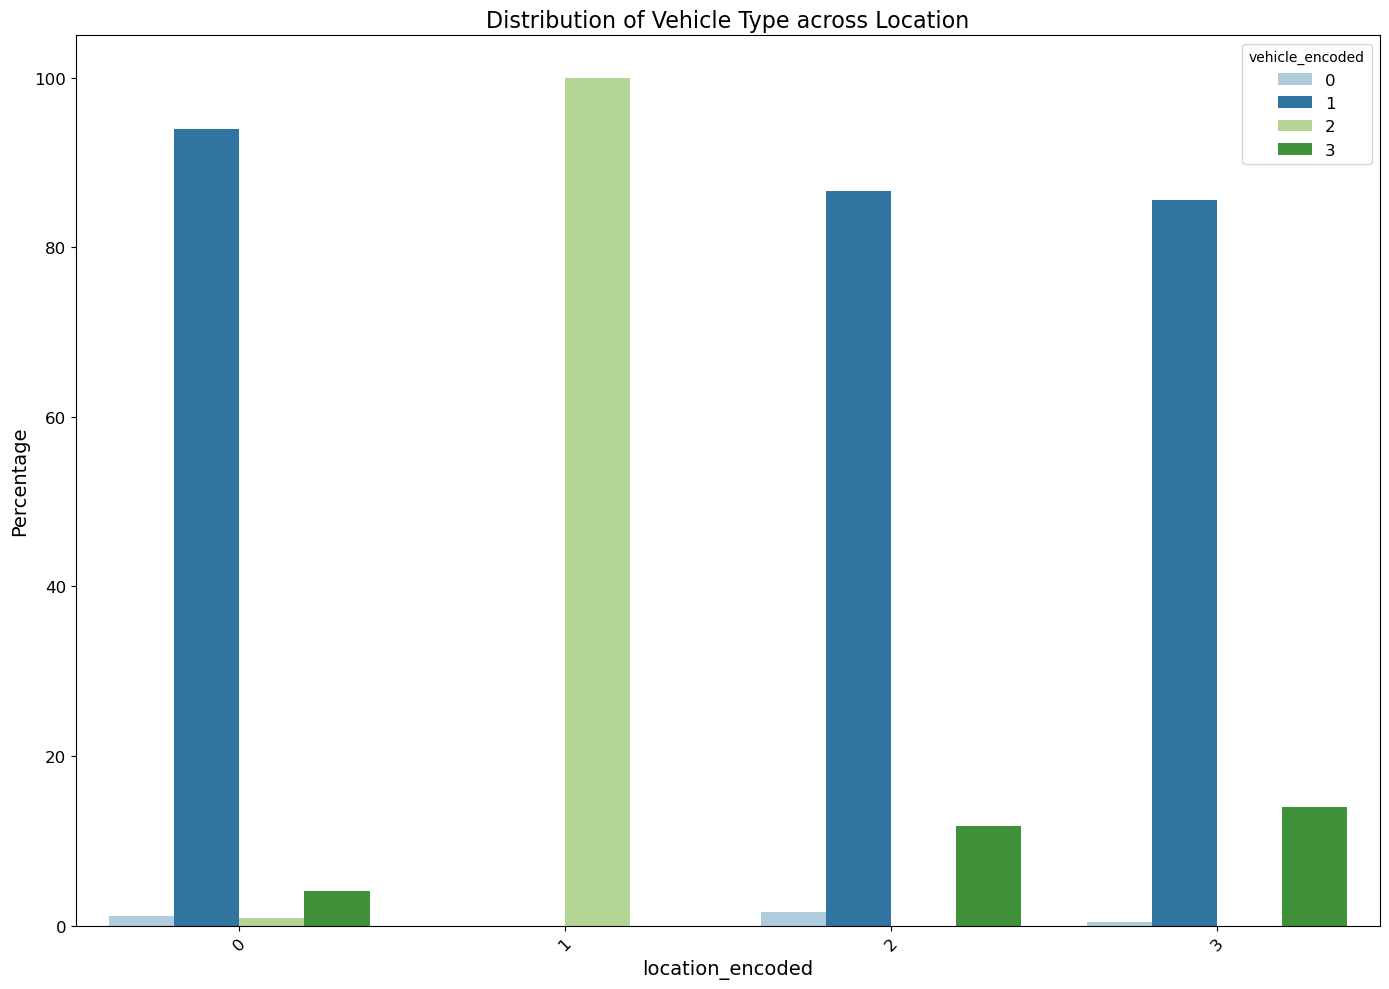

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by `location_encoded` and `vehicle_encoded` to count occurrences
grouped_data = df_vehicle_classification.groupby(['location_encoded', 'vehicle_encoded']).size().reset_index(name='count')

# Normalize the counts within each `location_encoded` to calculate percentages
grouped_data['percentage'] = grouped_data.groupby('location_encoded')['count'].transform(lambda x: x / x.sum() * 100)

# Plot the data
plt.figure(figsize=(14, 10))
sns.barplot(data=grouped_data, x='location_encoded', y='percentage', hue='vehicle_encoded', palette='Paired')

# Customize the plot
plt.title('Distribution of Vehicle Type across Location', fontsize=16)
plt.xlabel('location_encoded', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='vehicle_encoded', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotate for readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Speed_kmh is another feature, that has a weird distribution that could lead to overfitting:

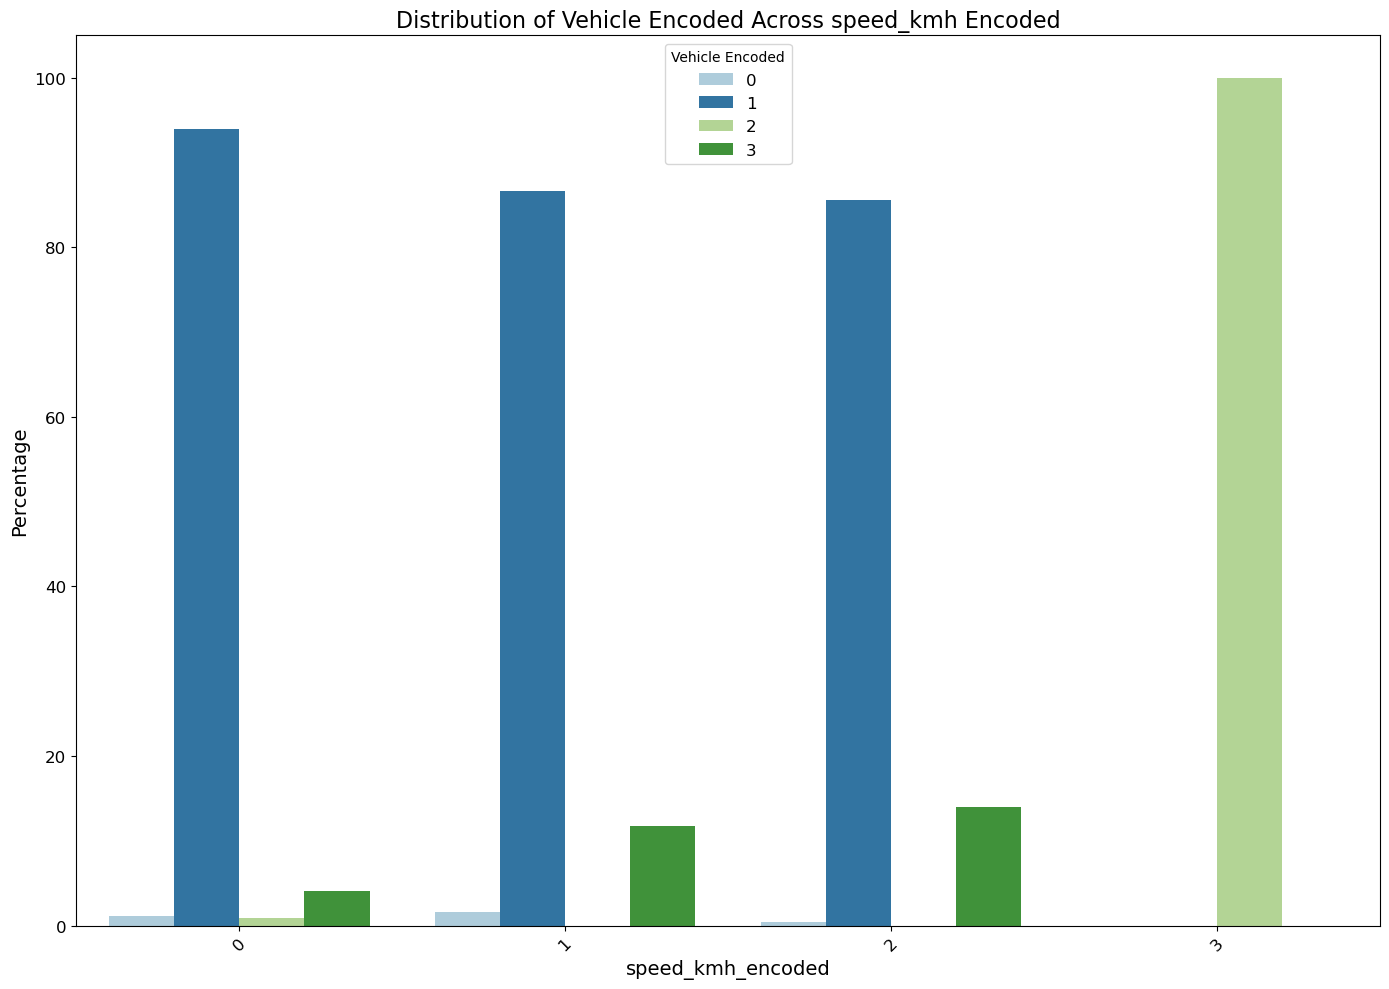

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by `speed_kmh_encoded` and `vehicle_encoded` to count occurrences
grouped_data = df_vehicle_classification.groupby(['speed_kmh_encoded', 'vehicle_encoded']).size().reset_index(name='count')

# Normalize the counts within each `speed_kmh_encoded` to calculate percentages
grouped_data['percentage'] = grouped_data.groupby('speed_kmh_encoded')['count'].transform(lambda x: x / x.sum() * 100)

# Plot the data
plt.figure(figsize=(14, 10))
sns.barplot(data=grouped_data, x='speed_kmh_encoded', y='percentage', hue='vehicle_encoded', palette='Paired')

# Customize the plot
plt.title('Distribution of Vehicle Encoded Across speed_kmh Encoded', fontsize=16)
plt.xlabel('speed_kmh_encoded', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Vehicle Encoded', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotate for readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Final results

Manually testing hyperparameter grids: Stage 1

=== Stage 1 Results ===
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 300, 'subsample': 1.0}
Best CV Score (Balanced Accuracy): 0.9239249287290372

=== Test Set Performance (Stage 1) ===
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       1.00      1.00      1.00      1561
           2       0.99      0.97      0.98        86

    accuracy                           0.99      1668
   macro avg       0.96      0.94      0.95      1668
weighted avg       0.99      0.99      0.99      1668



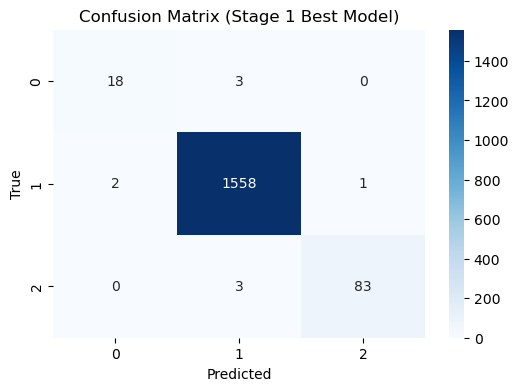

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

# 1) Data Loading & Filtering
# Assume you have df_vehicle_classification loaded in memory
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

X = df_filtered.drop(columns=[
    'file', 'vehicle_encoded', 'is_background_encoded', 
    'Unnamed: 0', 'date_time_encoded', 'location_encoded', 'speed_kmh_encoded'
])
y = df_filtered['vehicle_encoded']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 2) XGBoost Classifier
xgb_model = XGBClassifier(
    eval_metric='mlogloss',  # recommended for multi-class
    random_state=42
)

# 3) Param Grid for GridSearchCV
param_grid_stage1 = {
    'n_estimators': [50, 150, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 4, 6],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_search1 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_stage1,
    cv=3,  # fewer folds → faster
    scoring='balanced_accuracy',  # better if data is imbalanced
    n_jobs=-1
)

# 4) Fit the First Grid Search
grid_search1.fit(X_train, y_train)

print("=== Stage 1 Results ===")
print("Best Params:", grid_search1.best_params_)
print("Best CV Score (Balanced Accuracy):", grid_search1.best_score_)

# 5) Evaluate on Test Set
best_model_stage1 = grid_search1.best_estimator_
y_pred_stage1 = best_model_stage1.predict(X_test)

print("\n=== Test Set Performance (Stage 1) ===")
print(classification_report(y_test, y_pred_stage1))

cm = confusion_matrix(y_test, y_pred_stage1)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (Stage 1 Best Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Round 2 with narrowed hyperparameter grid:

=== Stage 2 Results ===
Best Params (Stage 2): {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 300, 'subsample': 1.0}
Best CV Score (Balanced Accuracy): 0.9239249287290372

=== Test Set Performance (Stage 2) ===
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       1.00      1.00      1.00      1561
           2       0.99      0.97      0.98        86

    accuracy                           0.99      1668
   macro avg       0.96      0.94      0.95      1668
weighted avg       0.99      0.99      0.99      1668



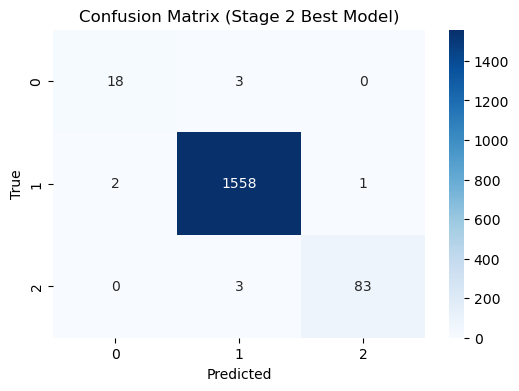

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

# 1) Data Loading & Filtering
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

X = df_filtered.drop(columns=[
    'file', 'vehicle_encoded', 'is_background_encoded', 
    'Unnamed: 0', 'date_time_encoded', 'location_encoded', 'speed_kmh_encoded'
])
y = df_filtered['vehicle_encoded']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 2) XGBoost Classifier (same setup as Stage 1)
xgb_model_stage2 = XGBClassifier(
    eval_metric='mlogloss', 
    random_state=42
)

# 3) Narrowed Param Grid for Stage 2
# Based on best_params_ from Stage 1,
# We'll search around those values in a smaller range.
param_grid_stage2 = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [1, 2, 3],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}

grid_search2 = GridSearchCV(
    estimator=xgb_model_stage2,
    param_grid=param_grid_stage2,
    cv=3,
    scoring='balanced_accuracy',
    n_jobs=-1
)

# 4) Fit the Second Grid Search
grid_search2.fit(X_train, y_train)

print("=== Stage 2 Results ===")
print("Best Params (Stage 2):", grid_search2.best_params_)
print("Best CV Score (Balanced Accuracy):", grid_search2.best_score_)

# 5) Evaluate on Test Set (Stage 2 Best Model)
best_model_stage2 = grid_search2.best_estimator_
y_pred_stage2 = best_model_stage2.predict(X_test)

print("\n=== Test Set Performance (Stage 2) ===")
print(classification_report(y_test, y_pred_stage2))

cm = confusion_matrix(y_test, y_pred_stage2)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (Stage 2 Best Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Below is a single snippet that adds custom class weights for the multi‐class XGBoost training. Since scale_pos_weight in XGBoost is primarily intended for binary tasks, we have to instead compute per‐sample weights based on the class frequencies and pass them to fit() via sample_weight. This is a common approach when having significant class imbalance in multi‐class classification.

=== Stage 2 Results ===
Best Params (Stage 2): {'colsample_bytree': 0.9, 'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 300, 'subsample': 1.0}
Best CV Score (Balanced Accuracy): 0.9499993263503232

=== Test Set Performance (Stage 2, Class-Weighted) ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       1.00      1.00      1.00      1561
           2       0.99      0.98      0.98        86

    accuracy                           0.99      1668
   macro avg       0.94      0.96      0.95      1668
weighted avg       0.99      0.99      0.99      1668



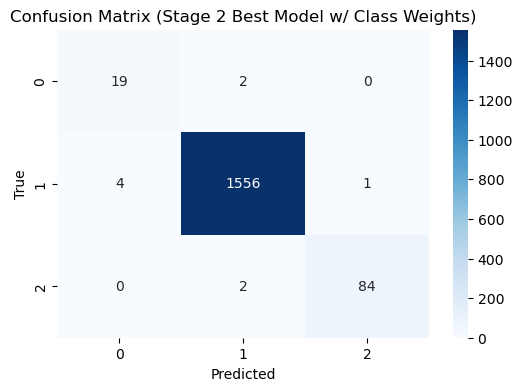

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

# 1) Data Loading & Filtering
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

X = df_filtered.drop(columns=[
    'file', 'vehicle_encoded', 'is_background_encoded',
    'Unnamed: 0', 'date_time_encoded', 'location_encoded', 'speed_kmh_encoded'
])
y = df_filtered['vehicle_encoded']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 2) Compute Per-Sample Weights for Multi-Class Imbalance
# typical formula i found that i saw in another code:
#   class_weight(c) = total_samples / (num_classes * count(c))
# Then map each target label y[i] to its weight
class_counts = y_train.value_counts()
num_classes = y_train.nunique()
class_weight_dict = class_counts.sum() / (num_classes * class_counts)
# Convert each training sample's target label to its weight
sample_weight_train = y_train.map(class_weight_dict)

# 3) XGBoost Classifier
xgb_model_stage2 = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42
)

# 4) Narrowed Param Grid
param_grid_stage2 = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [1, 2, 3],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}

grid_search2 = GridSearchCV(
    estimator=xgb_model_stage2,
    param_grid=param_grid_stage2,
    cv=3,                         # 3-fold cross validation
    scoring='balanced_accuracy',  # helpful for imbalanced data
    n_jobs=-1
)

# 5) Fit the Second Grid Search (with sample_weight)
# pass the per-sample weights to each fit call
grid_search2.fit(X_train, y_train, sample_weight=sample_weight_train)

print("=== Stage 2 Results ===")
print("Best Params (Stage 2):", grid_search2.best_params_)
print("Best CV Score (Balanced Accuracy):", grid_search2.best_score_)

# 6) Evaluate on Test Set (Stage 2 Best Model)
best_model_stage2 = grid_search2.best_estimator_
# For the test set, you typically do *not* apply the training weights again.
y_pred_stage2 = best_model_stage2.predict(X_test)

print("\n=== Test Set Performance (Stage 2, Class-Weighted) ===")
print(classification_report(y_test, y_pred_stage2))

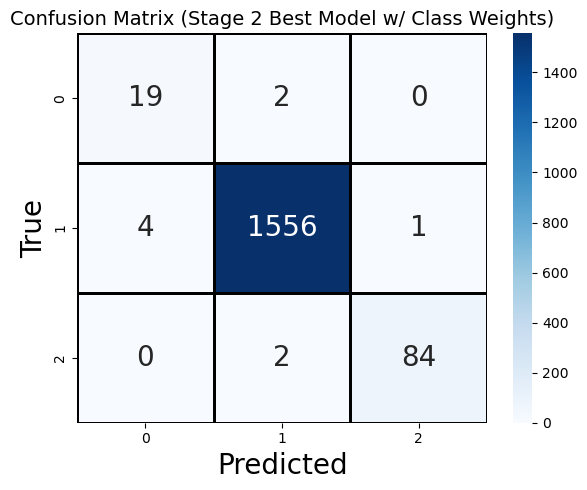

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_stage2)

# Create the plot
plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap="Blues",
    linewidths=1,  # Adds line separators
    linecolor='black',  # Line color
    annot_kws={"size": 20}  # Increases font size for numbers
)

# Titles and labels
plt.title("Confusion Matrix (Stage 2 Best Model w/ Class Weights)", fontsize=14)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("True", fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/vh/1t1ywg4n4fq7xwpclrv4jdyc0000gn/T/ipykernel_18375/4136403354.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


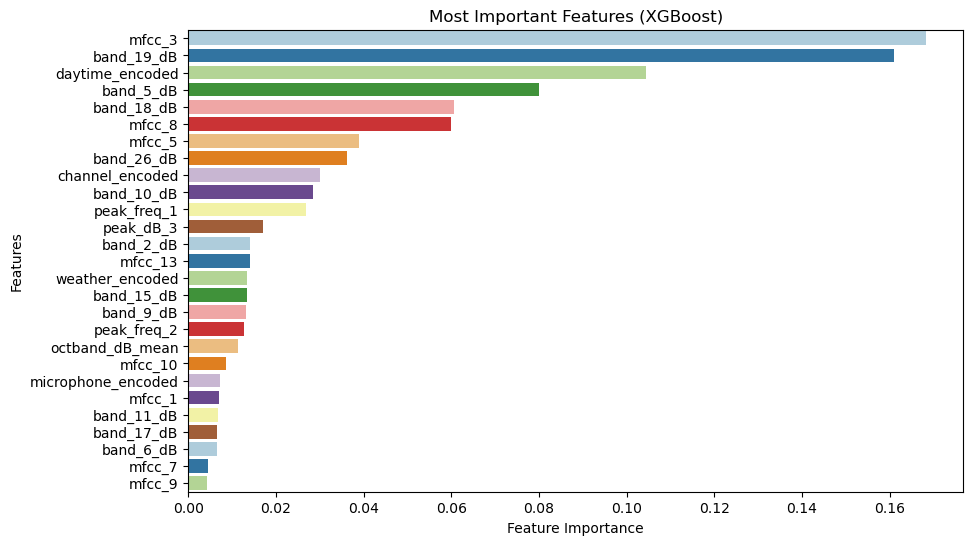

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = best_model_stage2.feature_importances_
feature_names = X_train.columns

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Keep only the first half of the most important features
half_features = len(importance_df) // 2
importance_df = importance_df.iloc[:half_features]

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette="Paired"
)

plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Most Important Features (XGBoost)")
plt.show()